# Classification algorithms

In [1]:
import numpy as np

When developing algorithms it is often desirable to have datasets for testing purposes. When there is no access to a suitable dataset, sometimes it is convenient to generate synthetic data. In this tutorial, we will  
1. create synthetic datasets consisting of two classes of objects;
2. develop the k-NN algorithm;
3. evaluate the algorithm's ability to separate the two classes of objects.

## Excercise 1. Create synthetic dataset

We would like to generate training and validation datasets for binary classification. For visualisation purposes, we will assume that our objects have 2 numeric features. We would like to generate 2 "cloulds" of points on the plane corresponding to the positive and negative objects respectively. To do this, one can generate random points from a [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (function $\texttt{np.random.multivariate_normal}$). For example, $\texttt{np.random.multivariate_normal([a,b], [[1,0],[0,1]], N)}$ will generate a set on N points scattered around the *mean* point $(a,b)$.

1. Create two sets of $N=10$ points. The first set scattered around the point $(0,0)$ and the second scattered around the point $(2,2)$. These sets of points will correspond to the positive and the negative class respectively.

In [2]:
N = 10

In [ ]:
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
positive_points = np.random.multivariate_normal(mean1, cov1, N)

mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
negative_points = np.random.multivariate_normal(mean2, cov2, N)

2. Plot the generated sets of points. Use different colours or markers for different classes.

In [4]:
import matplotlib.pyplot as plt

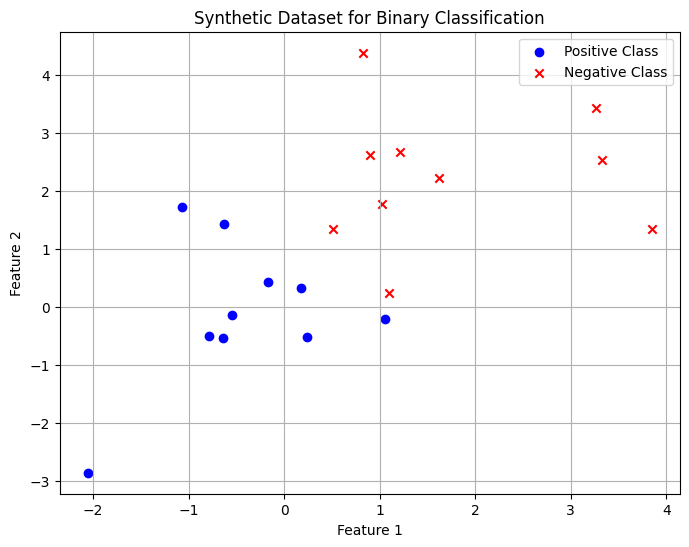

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], label='Positive Class', marker='o', color='blue')
plt.scatter(negative_points[:, 0], negative_points[:, 1], label='Negative Class', marker='x', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset for Binary Classification')
plt.legend()
plt.grid(True)
plt.show()

3. Split each of the sets into equal train and validation portions. As a result you should have four sets:
- positive object in the train dataset;
- positive object in the validation dataset;
- negataive object in the train dataset;
- negataive object in the validation dataset;

To confirm that the sets have equal numbers of objects, print the number of elements in each set.

In [7]:
split_ratio = 0.5
split_index = int(N * split_ratio)

positive_train = positive_points[:split_index]
positive_val = positive_points[split_index:]

negative_train = negative_points[:split_index]
negative_val = negative_points[split_index:]

print("Positive Train:", len(positive_train))
print("Positive Validation:", len(positive_val))
print("Negative Train:", len(negative_train))
print("Negative Validation:", len(negative_val))

Positive Train: 5
Positive Validation: 5
Negative Train: 5
Negative Validation: 5


4. Add an extra freature (representing the class label: +1 for the positive class, -1 for the negative class) to the train and validation instances. As a result you will have two datasets, each consisting of tuples (label, instance).

In [ ]:
# Create training dataset
train_data = []
for instance in positive_train:
    train_data.append((1, instance))
for instance in negative_train:
    train_data.append((-1, instance))
# Create validation dataset
val_data = []
for instance in positive_val:
    val_data.append((1, instance))
for instance in negative_val:
    val_data.append((-1, instance))

## Excercise 2. Develop the k-NN algorithm

Implement k-NN prediction function that uses the training dataset from the previous exercise. Use cosine similarity as a "measure of distance". The larger the similarity between two objects, the closer the objects are to each other.

1. Create the cosine similarity function that will be used in the k-NN prediction function to find the neighbours. The function should take two vectors as input and output the cosine similarity between the vectors.

In [10]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0
    return dot_product / (norm_v1 * norm_v2)

2. Implement a function that predicts the class of a validation instance using the k-NN algorithm. The function should take a validation instance and the parameter $k$ as input, and output predicted class of the validation instance (+1 or -1).

In [12]:
def knn_predict(validation_instance, k, train_data):
    similarities = []
    for label, instance in train_data:
        similarity = cosine_similarity(validation_instance, instance)
        similarities.append((similarity, label))

    similarities.sort(key=lambda x: x[0], reverse=True)

    k_nearest_neighbors = similarities[:k]

    positive_votes = sum(1 for _, label in k_nearest_neighbors if label == 1)
    negative_votes = sum(1 for _, label in k_nearest_neighbors if label == -1)

    if positive_votes > negative_votes:
        return 1
    elif negative_votes > positive_votes:
        return -1
    else:
        return 0

## Excercise 3. Evaluate the algorithm

1. Implement $\texttt{kNNaccuracy}$ function that takes the parameter $k$ and the validation dataset as input and output the accuracy of the k-NN algorithm on the validation dataset. Use the function to compute the accuracy of prediciton of the k-NN classifier on the validation dataset, when $k = 5$.

In [14]:
def kNNaccuracy(k, validation_data):
    correct_predictions = 0
    for label, instance in validation_data:
        predicted_label = knn_predict(instance, k, train_data)
        if predicted_label == label:
            correct_predictions += 1
    return correct_predictions / len(validation_data)

# Compute and print the accuracy for k=5
accuracy = kNNaccuracy(5, val_data)
print(f"Accuracy for k=5: {accuracy}")


Accuracy for k=5: 0.8


2. Generate new datasets with $N=100$. Compute accuracies of k-NN for all odd $k$ from 1 to 99. Plot k-NN accuracy versus $k$. What is the best value of $k$ for the validation dataset?

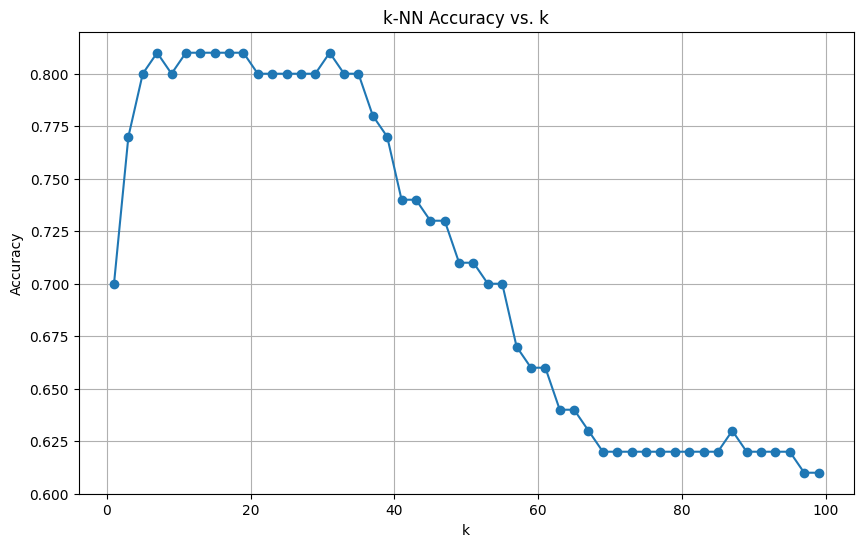

The best value of k is: 7


In [15]:
N = 100
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
positive_points = np.random.multivariate_normal(mean1, cov1, N)

mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
negative_points = np.random.multivariate_normal(mean2, cov2, N)

split_ratio = 0.5
split_index = int(N * split_ratio)

positive_train = positive_points[:split_index]
positive_val = positive_points[split_index:]

negative_train = negative_points[:split_index]
negative_val = negative_points[split_index:]

train_data = []
for instance in positive_train:
    train_data.append((1, instance))
for instance in negative_train:
    train_data.append((-1, instance))

val_data = []
for instance in positive_val:
    val_data.append((1, instance))
for instance in negative_val:
    val_data.append((-1, instance))

k_values = list(range(1, 100, 2))
accuracies = []
for k in k_values:
    accuracy = kNNaccuracy(k, val_data)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"The best value of k is: {best_k}")

3. Conduct further experiments:
    * change the value of $k$
    * increase the number of instances $N$ (make sure that $N$ is even)
    * separate or bring together the two classes by adjusting the means of the two Gaussians.

How does the accuracy vary in each case?